# creating Neural Network From scratch

In [53]:
import torch
import torch.nn as nn
import pandas as pd

In [54]:
df=pd.read_csv("C:\\Users\\praha\\Downloads\\diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
import seaborn as sns

In [57]:

import numpy as np


In [58]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:

X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [62]:
X_train= torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
Y_train=torch.LongTensor(Y_train)
Y_test=torch.LongTensor(Y_test)

In [63]:
class ANNModel(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,output_feature=2):
        super().__init__()
        self.inputlayer=nn.Linear(input_features,hidden1)
        self.L2=nn.Linear(hidden1,hidden2)
        self.L3=nn.Linear(hidden2,output_feature)
    def forward(self,X):
        X=F.relu(self.inputlayer(X))
        X=F.relu(self.L2(X))
        X=self.L3(X)
        return X
        

In [64]:
torch.manual_seed(20)
model=ANNModel()

In [65]:
model.parameters

<bound method Module.parameters of ANNModel(
  (inputlayer): Linear(in_features=8, out_features=20, bias=True)
  (L2): Linear(in_features=20, out_features=20, bias=True)
  (L3): Linear(in_features=20, out_features=2, bias=True)
)>

In [66]:
loss_function=nn.CrossEntropyLoss()
optimzer=torch.optim.Adam(model.parameters(),lr=0.01)

In [87]:
epochs=500
final_loss=[]
for i in range(epochs):
    i=i+1
    Y_Pred=model.forward(X_train)
    Loss=loss_function(Y_Pred,Y_train)
    final_loss.append(Loss.item())
    if i%10==1:
        print("epoch : {}, Loss:{}".format(i,Loss))    
    optimzer.zero_grad()
    Loss.backward()
    optimzer.step()
    

epoch : 1, Loss:0.23065988719463348
epoch : 11, Loss:0.2143656611442566
epoch : 21, Loss:0.17768354713916779
epoch : 31, Loss:0.18504494428634644
epoch : 41, Loss:0.17261262238025665
epoch : 51, Loss:0.14593608677387238
epoch : 61, Loss:0.1320762187242508
epoch : 71, Loss:0.13011592626571655
epoch : 81, Loss:0.1272335797548294
epoch : 91, Loss:0.12696057558059692
epoch : 101, Loss:0.1424398422241211
epoch : 111, Loss:0.14373882114887238
epoch : 121, Loss:0.14166098833084106
epoch : 131, Loss:0.14662499725818634
epoch : 141, Loss:0.1519695669412613
epoch : 151, Loss:0.14817798137664795
epoch : 161, Loss:0.18299269676208496
epoch : 171, Loss:0.1482057422399521
epoch : 181, Loss:0.15036071836948395
epoch : 191, Loss:0.13885250687599182
epoch : 201, Loss:0.12746304273605347
epoch : 211, Loss:0.1245659664273262
epoch : 221, Loss:0.12795133888721466
epoch : 231, Loss:0.2997499406337738
epoch : 241, Loss:0.2076118141412735
epoch : 251, Loss:0.17918644845485687
epoch : 261, Loss:0.179998517036

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'epochs')

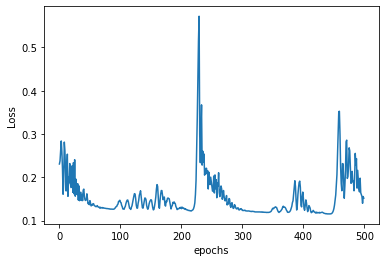

In [88]:
plt.plot(range(epochs),final_loss)
plt.ylabel("Loss")
plt.xlabel("epochs")

In [89]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
cm

array([[74, 33],
       [17, 30]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

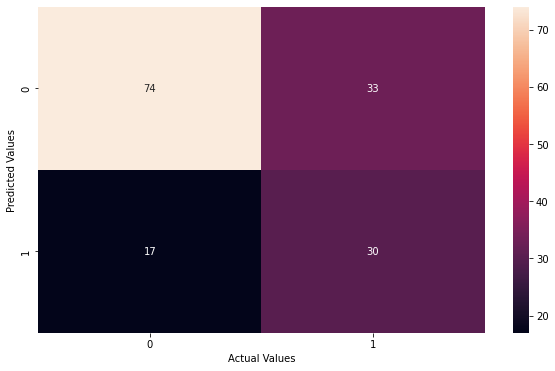

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [94]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,predictions)
score

0.6753246753246753

In [95]:
torch.save(model,'diabetes.pt')

In [96]:
model=torch.load('diabetes.pt')

In [97]:
model.eval()

ANNModel(
  (inputlayer): Linear(in_features=8, out_features=20, bias=True)
  (L2): Linear(in_features=20, out_features=20, bias=True)
  (L3): Linear(in_features=20, out_features=2, bias=True)
)

In [98]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [101]:
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [102]:
new_data=torch.tensor(lst1)

In [103]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.3107, 4.4886])
1
